In [1]:
import Data.dataset as ds
import Plots.plots as pl
import Calculations.monte_carlo as mc
import Calculations.calculations as cal
import Calculations.probability as pb
from fitter import Fitter, get_common_distributions, get_distributions


import numpy as np 
import statsmodels.api as sm 
import pylab as py

In [2]:
zone1 = ds.get_out1()
zone2 = ds.get_out2()

mass = ('Mass', 'Mass [kg]')
velocity = ('Velocity', 'Velocity [m/s]')
kinetic_energy = ('Kinetic Energy', 'Kinetic Energy [kJ]')
timedelta = ('Timedelta', 'TimeDiffHours')
n_years = 10000

In [3]:
without_outliers_zone1 = ds.replace_outliers_with_median(zone1)
without_outliers_zone2 = ds.replace_outliers_with_median(zone2)

Zone1 Timedelta


,TimeDiffHours
0,0.0
1,15.0
2,26.0
3,23.0
4,33.0
...,...
2910647,44.0
2910648,27.0
2910649,29.0
2910650,31.0


Zone2 Timedelta


,TimeDiffHours
0,0.0
1,54.0
2,21.0
3,26.0
4,21.0
...,...
1902478,54.0
1902479,12.0
1902480,25.0
1902481,46.0


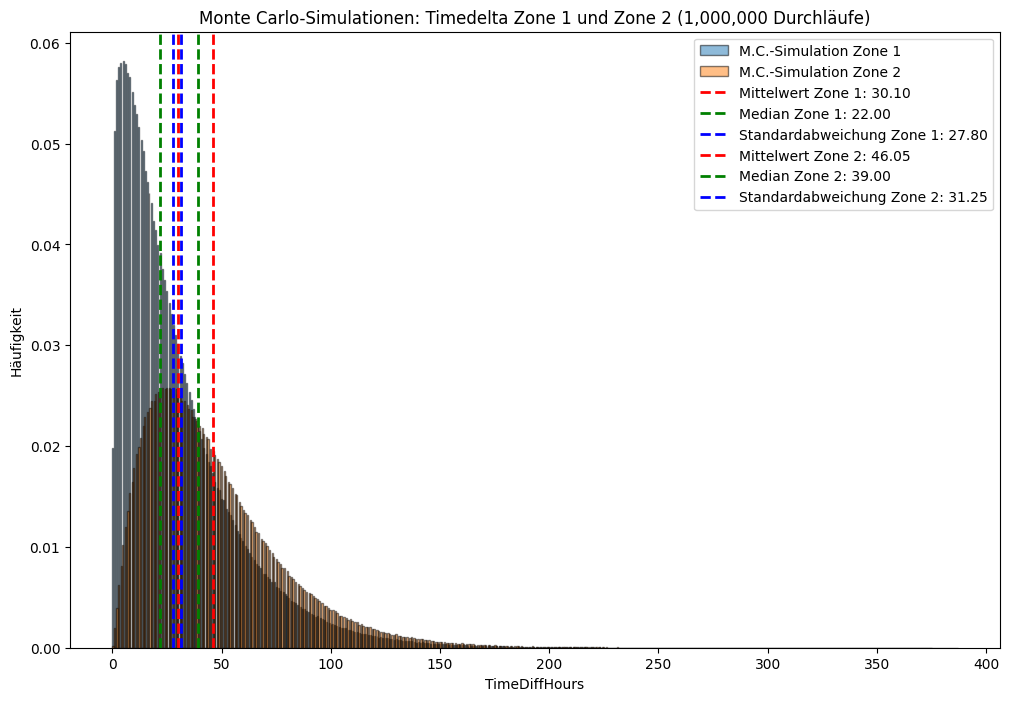

In [4]:
print('Zone1 Timedelta')
sim_timediff_zone1 = mc.simulate_gamma_distribution_timediff(without_outliers_zone1, n_years, timedelta)
display(sim_timediff_zone1)

print('Zone2 Timedelta')
sim_timediff_zone2 = mc.simulate_gamma_distribution_timediff(without_outliers_zone2, n_years, timedelta)
display(sim_timediff_zone2)

pl.show_simulated_data(sim_timediff_zone1, sim_timediff_zone2, timedelta)

n_simulations_zone1 = len(sim_timediff_zone1)
n_simulations_zone2 = len(sim_timediff_zone2)

Zone1 Velocity


,Velocity [m/s]
0,6.370386
1,11.522822
2,10.412213
3,11.119853
4,11.596917
...,...
2910647,7.894320
2910648,9.429265
2910649,11.080024
2910650,6.980824


Zone2 Velocity


,Velocity [m/s]
0,42.970788
1,40.998094
2,41.684036
3,41.745999
4,36.917391
...,...
1902478,29.833999
1902479,31.804056
1902480,29.247434
1902481,28.669448


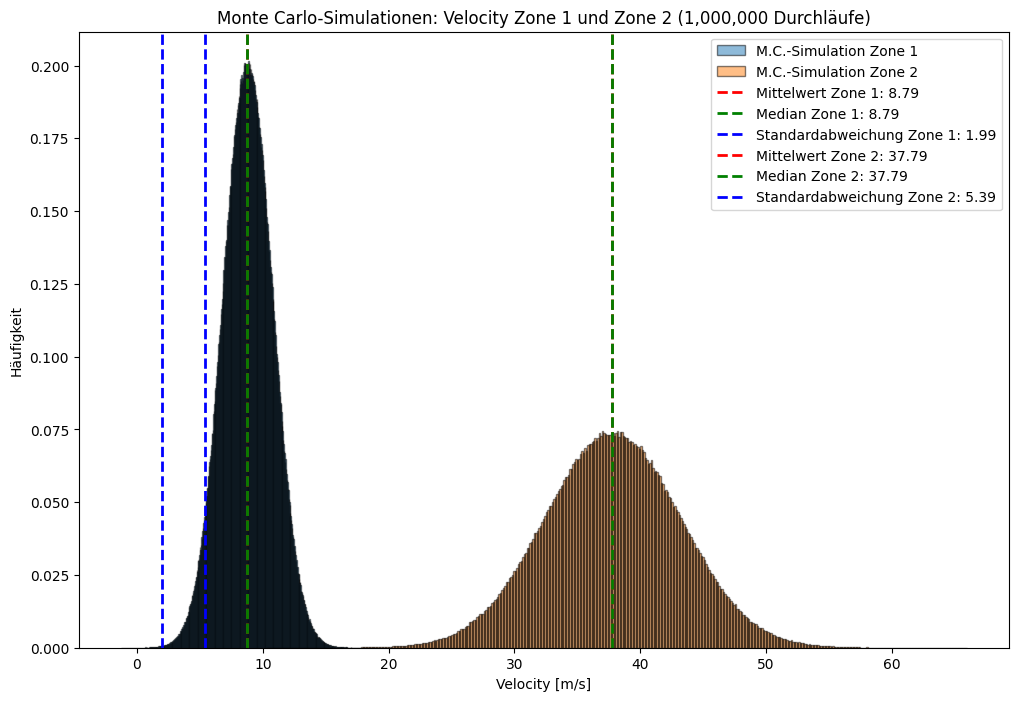

In [5]:
print('Zone1 Velocity')
sim_velocity_zone1 = mc.simulate_norm_distribution(without_outliers_zone1, n_simulations_zone1, velocity)
display(sim_velocity_zone1)

print('Zone2 Velocity')
sim_velocity_zone2 = mc.simulate_norm_distribution(without_outliers_zone2, n_simulations_zone2, velocity)
display(sim_velocity_zone2)

pl.show_simulated_data(sim_velocity_zone1, sim_velocity_zone2, velocity)

Zone1 Mass


,Mass [kg]
0,507.061350
1,791.834042
2,204.050069
3,310.472725
4,283.382152
...,...
2910647,413.016644
2910648,420.492727
2910649,267.965468
2910650,456.452086


Zone2 Mass


,Mass [kg]
0,19.823409
1,152.701878
2,19.735770
3,4.209018
4,127.082356
...,...
1902478,81.745038
1902479,34.497369
1902480,58.882093
1902481,129.340988


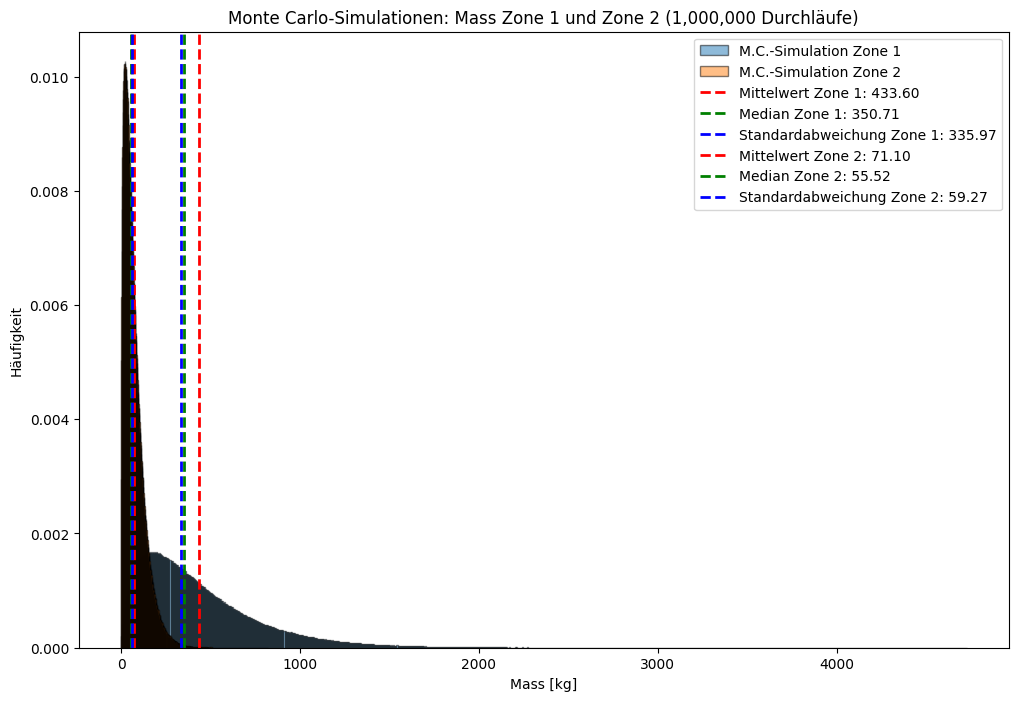

In [6]:
print('Zone1 Mass')
sim_mass_zone1 = mc.simulate_gamma_distribution(without_outliers_zone1, n_simulations_zone1, mass)
display(sim_mass_zone1)

print('Zone2 Mass')
sim_mass_zone2 = mc.simulate_gamma_distribution(without_outliers_zone2, n_simulations_zone2, mass)
display(sim_mass_zone2)

pl.show_simulated_data(sim_mass_zone1, sim_mass_zone2, mass)

In [7]:
merged_zone1 = ds.merge_simulated_data(sim_mass_zone1, sim_velocity_zone1, sim_timediff_zone1)
merged_zone2 = ds.merge_simulated_data(sim_mass_zone2, sim_velocity_zone2, sim_timediff_zone2)

print('Zone1')
display(merged_zone1)
print('Zone2')
display(merged_zone2)

Zone1


,DateTime,Year,Month,Day,Timestamp,Mass [kg],Velocity [m/s],Kinetic Energy [kJ],TimeDiffHours
0,0001-01-01 00:00:00,1,1,1,00:00,507.061350,6.370386,10.288734,0.0
1,0001-01-01 15:00:00,1,1,1,15:00,791.834042,11.522822,52.568051,15.0
2,0001-01-02 17:00:00,1,1,2,17:00,204.050069,10.412213,11.060961,26.0
3,0001-01-03 16:00:00,1,1,3,16:00,310.472725,11.119853,19.195153,23.0
4,0001-01-05 01:00:00,1,1,5,01:00,283.382152,11.596917,19.055818,33.0
...,...,...,...,...,...,...,...,...,...
2910647,9994-05-06 09:00:00,9994,5,6,09:00,413.016644,7.894320,12.869659,44.0
2910648,9994-05-07 12:00:00,9994,5,7,12:00,420.492727,9.429265,18.693224,27.0
2910649,9994-05-08 17:00:00,9994,5,8,17:00,267.965468,11.080024,16.448651,29.0
2910650,9994-05-10 00:00:00,9994,5,10,00:00,456.452086,6.980824,11.121889,31.0


Zone2


,DateTime,Year,Month,Day,Timestamp,Mass [kg],Velocity [m/s],Kinetic Energy [kJ],TimeDiffHours
0,0001-01-01 00:00:00,1,1,1,00:00,19.823409,42.970788,18.301850,0.0
1,0001-01-03 06:00:00,1,1,3,06:00,152.701878,40.998094,128.333994,54.0
2,0001-01-04 03:00:00,1,1,4,03:00,19.735770,41.684036,17.146031,21.0
3,0001-01-05 05:00:00,1,1,5,05:00,4.209018,41.745999,3.667588,26.0
4,0001-01-06 02:00:00,1,1,6,02:00,127.082356,36.917391,86.599876,21.0
...,...,...,...,...,...,...,...,...,...
1902478,9994-05-05 15:00:00,9994,5,5,15:00,81.745038,29.833999,36.379302,54.0
1902479,9994-05-06 03:00:00,9994,5,6,03:00,34.497369,31.804056,17.447010,12.0
1902480,9994-05-07 04:00:00,9994,5,7,04:00,58.882093,29.247434,25.184236,25.0
1902481,9994-05-09 02:00:00,9994,5,9,02:00,129.340988,28.669448,53.155089,46.0


In [8]:
sim_rocks_in_net = cal.sim_calculate_cumulative_mass_since_clearing(merged_zone1, merged_zone2)
display(sim_rocks_in_net)

,DateTime,Zone,Mass [kg],Velocity [m/s],Kinetic Energy [kJ],CumulativeMassInNet
0,1-01-01 00:00,1,507.061350,6.370386,10.288734,0.000000
0,1-01-01 00:00,2,19.823409,42.970788,18.301850,0.000000
1,1-01-01 15:00,1,791.834042,11.522822,52.568051,0.000000
2,1-01-02 17:00,1,204.050069,10.412213,11.060961,0.000000
1,1-01-03 06:00,2,152.701878,40.998094,128.333994,0.000000
...,...,...,...,...,...,...
2910649,9994-05-08 17:00,1,267.965468,11.080024,16.448651,0.000000
1902481,9994-05-09 02:00,2,129.340988,28.669448,53.155089,267.965468
2910650,9994-05-10 00:00,1,456.452086,6.980824,11.121889,0.000000
1902482,9994-05-11 06:00,2,153.481493,43.844667,147.522942,0.000000


In [9]:
net_brake_probability = pb.calculate_probability(sim_rocks_in_net)
print(net_brake_probability*100, '% Netzbruchwahrscheinlichkeit')

93
0.001932212580781549 % Netzbruchwahrscheinlichkeit
